**ogs@jupyter-lab: heat diffusion**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-workflows.png" alt="drawing" width="300"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [7]:
from ogs6py import ogs
#run ogs
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="diffusion_1D.prj")
model.run_model(path="/home/ok/ogs/build/release/bin/",LOGFILE="example.log")

>>> run ogs <<<
OGS finished with project file diffusion_1D.prj.
Execution took 0.4758729934692383 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
diffusion_1D.pvd


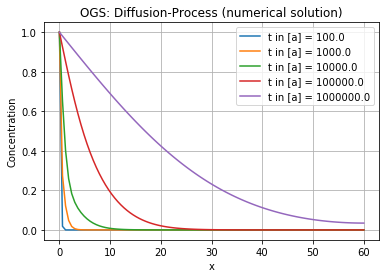

In [9]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("diffusion_1D.pvd", dim=1)
# define xaxis
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=62.0, num=100)]
r_x = np.array(xaxis)[:,0]
# define timestep
time = [3153600000,31536000000,315360000000,3153600000000,31536000000000]
# read and interpolate from vtu-files listed in pvd
for t in time:
    xaxis_t = pvdfile.read_point_set_data(t, 'temperature', pointsetarray=xaxis)
    plt.plot(r_x, xaxis_t, label='t in [a] = '+str(t/31536000))
# plot formatting
titlestring="OGS: Diffusion-Process (numerical solution)"
plt.title(titlestring)
#plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.savefig("diffusion_1D.png")
plt.show()

**Results have been shown using [matplotlib](https://matplotlib.org/)**